In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
df = pd.read_csv('chennai_reservoir_levels.csv')
df

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0
...,...,...,...,...,...
6177,29-11-2020,2814.0,403.0,2819.0,3120.0
6178,30-11-2020,2848.0,465.0,2833.0,3120.0
6179,01-12-2020,2902.0,504.0,2841.0,3123.0
6180,02-12-2020,2873.0,547.0,2847.0,3125.0


In [2]:
df.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [3]:
df.tail()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
6177,29-11-2020,2814.0,403.0,2819.0,3120.0
6178,30-11-2020,2848.0,465.0,2833.0,3120.0
6179,01-12-2020,2902.0,504.0,2841.0,3123.0
6180,02-12-2020,2873.0,547.0,2847.0,3125.0
6181,03-12-2020,2867.0,590.0,2878.0,3137.0


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df.head()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
Date,,,,
2004-01-01,3.9,0.0,268.0,0.0
2004-02-01,3.9,0.0,268.0,0.0
2004-03-01,3.9,0.0,267.0,0.0
2004-04-01,3.9,0.0,267.0,0.0
2004-05-01,3.8,0.0,267.0,0.0


<AxesSubplot:xlabel='Date'>

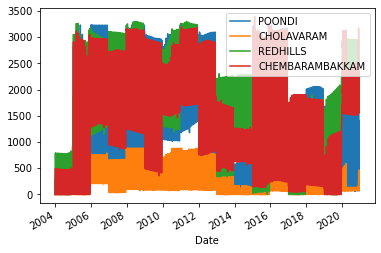

In [20]:
df.plot()

In [4]:
from statsmodels.tsa.stattools import adfuller

In [5]:
test_result=adfuller(df['POONDI'])

In [6]:
def adfuller_test(SubTotalThermal):
    result=adfuller(SubTotalThermal)
    labels = ['ADF Test Statistic','p-value', '#Lags Used', 'Number of observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis (Ho), reject the null hypothesis.")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indication")

In [7]:
 adfuller_test(df['POONDI'])

ADF Test Statistic : -3.949555265857682
p-value : 0.0016989519693194478
#Lags Used : 15
Number of observations Used : 6166
strong evidence against the null hypothesis (Ho), reject the null hypothesis.


In [8]:
!pip install pmdarima


In [9]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
stepwise_fit = auto_arima(df['POONDI'], trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=70677.939, Time=3.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=71577.841, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=70931.953, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=70991.310, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=71576.053, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=70678.474, Time=2.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=70926.817, Time=1.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=70679.931, Time=5.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=70680.076, Time=6.90 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=70930.874, Time=0.56 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=70677.919, Time=3.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=70855.154, Time=0.77 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=70679.902, Time=4.83 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=70899.146, Time=1.23 sec
 ARIMA(0,1,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6182
Model:               SARIMAX(1, 1, 3)   Log Likelihood              -35333.047
Date:                Mon, 11 Apr 2022   AIC                          70676.093
Time:                        02:55:15   BIC                          70709.740
Sample:                             0   HQIC                         70687.760
                               - 6182                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9318      0.012     77.932      0.000       0.908       0.955
ma.L1         -1.2923      0.012   -107.739      0.000      -1.316      -1.269
ma.L2          0.4181      0.005     88.039      0.000       0.409       0.427
ma.L3         -0.0224      0.003     -7.044      0.000      -0.029      -0.016
sigma2      5403.4521      5.580    968.356      0.000    5392.516    5414.389
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         132149555.67
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            11.87
Prob(H) (two-sided):                  0.00   Kurtosis:                       718.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
from statsmodels.tsa.arima_model import ARIMA


In [12]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape, test.shape)

(6182, 4)
(6152, 4) (30, 4)


In [14]:
model=ARIMA(train['POONDI'],order=(1,1,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.POONDI   No. Observations:                 6151
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -35124.258
Method:                       css-mle   S.D. of innovations             73.066
Date:                Mon, 11 Apr 2022   AIC                          70260.517
Time:                        02:55:26   BIC                          70300.863
Sample:                             1   HQIC                         70274.510
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2615      1.377      0.190      0.849      -2.438       2.961
ar.L1.D.POONDI     0.9318      0.013     70.764      0.000       0.906       0.958
ma.L1.D.POONDI    -1.3043      0.018    -70.627      0.000      -1.341      -1.268
ma.L2.D.POONDI     0.4281      0.021     20.042      0.000       0.386       0.470
ma.L3.D.POONDI    -0.0228      0.014     -1.636      0.102      -0.050       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0732           +0.0000j            1.0732            0.0000
MA.1            1.2326           +0.0000j            1.2326            0.0000
MA.2            2.3402           +0.0000j            2.3402            0.0000
MA.3           15.2157           +0.0000j           15.2157            0.0000
-----------------------------------------------------------------------------
"""

In [15]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start, end=end, typ='levels')

pred.index=df.index[start:end+1]
print(pred)

Date
2020-04-11    1543.124518
2020-05-11    1547.712914
2020-06-11    1552.450412
2020-07-11    1556.882699
2020-08-11    1561.030587
2020-09-11    1564.913468
2020-10-11    1568.549414
2020-11-11    1571.955262
2020-12-11    1575.146703
2020-11-13    1578.138356
2020-11-14    1580.943846
2020-11-15    1583.575865
2020-11-16    1586.046244
2020-11-17    1588.366004
2020-11-18    1590.545416
2020-11-19    1592.594049
2020-11-20    1594.520822
2020-11-21    1596.334044
2020-11-22    1598.041457
2020-11-23    1599.650278
2020-11-24    1601.167228
2020-11-25    1602.598573
2020-11-26    1603.950149
2020-11-27    1605.227397
2020-11-28    1606.435383
2020-11-29    1607.578832
2020-11-30    1608.662144
2020-01-12    1609.689420
2020-02-12    1610.664480
2020-03-12    1611.590885
dtype: float64


<AxesSubplot:xlabel='Date'>

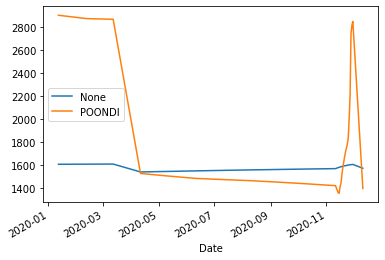

In [16]:
pred.plot(legend=True)
test['POONDI'].plot(legend=True)

In [17]:
test['POONDI'].mean()

1830.5666666666666

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred, test['POONDI']))
print(rmse)

579.7435309601445
